## LatexLibrary Example
This library creates some report structure and basic tex files for you to efficiently write a latex report. Requires a [TeX distribution](https://tex.stackexchange.com/questions/55437/how-do-i-update-my-tex-distribution). 

### 0. Create some Sample Data
Using a linear regression example from [sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py). 

In [1]:
import os
os.chdir('../src') 

In [2]:
from lib.databaseIO import pgIO
import jsonref
projConfig = jsonref.load(open('../config/modules/module1.json'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
descript = pd.DataFrame(diabetes.data, columns=diabetes.feature_names).describe()
descript

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


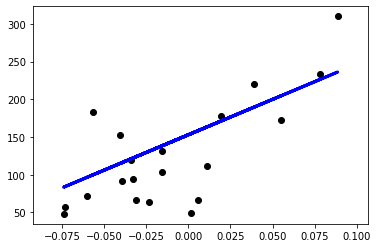

In [4]:
diabetes_X = diabetes.data[:, np.newaxis, 2] # using only 1 feature

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.savefig('../report/fig1.png')
plt.show()

In [5]:
results = pd.DataFrame([('Coefficient(s)', regr.coef_),
                      ('Mean Squared Error', mean_squared_error(diabetes_y_test, diabetes_y_pred)),
                      ('Variance Score', r2_score(diabetes_y_test, diabetes_y_pred))
                     ], columns=['Results','Values'])
results.Results = results.Results.astype('str')
results.Values  = results.Values.astype('int')

results

,Results,Values
0,Coefficient(s),938
1,Mean Squared Error,2548
2,Variance Score,0


In [6]:
# Generate 3 separate dataframes as an example
df1 = descript.s1
df2 = descript.s3
df3 = descript.s5

## 1. Initialize a Report Document
Create a report, give it a name, a title. <br>
Initialize to create the relevant directories. 

In [8]:
from lib.LaTeXreport import reportWriter as rw

In [14]:
rep = rw.Report('Example1') 
rep.title = "Report Example"
rep.author = "Insert Author Name here"
rep.date = '01/09/2019'
rep.initialize(rep.fpath)

Created ../report/Example1
Created ../report/Example1/sections
Created ../report/Example1/tables
Created ../report/Example1/figures
Created ../report/Example1/mappingTables
Created ../report/Example1/output
>> Example1 report structure has been initialized.


## 2. Add Report Content
- `saveFigure` to add Figures from an existing file path to the newly created figures directory. 
- `saveTable` to convert a pandas dataframe into a TEX file in the newly created tables directory. 

Optional: 
* `caption` for both tables and figures to be appended at the bottom
* `option` for figures to scale, adjust width/height.
* `override` for whether you want to re-generate the .png/.tex files. Default = False (will NOT override).

Copying Figure1.png to ../report/NewReport/figures.


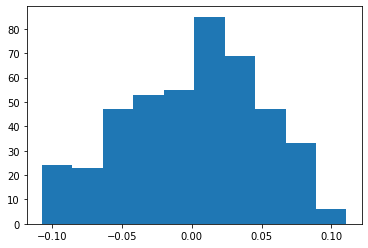

In [10]:
### Add figures ###
# 1. by copying from other filepath 
rep.saveFigure('Figure1', 
               '../report/fig1.png', # some other filepath
               caption='This is a plot of the linear reg output.', 
               option='scale=0.6', override=True)

# 2. by saving or moving directly to figures folder if it's already created
plt.hist(diabetes_df.age)
plt.savefig(rep.fpath+'/figures/Figure2.png')
rep.saveFigure('Figure2', 
               caption='This image was saved directly to the current folder.',
               option=r'width=0.5\textwidth')

In [11]:
### Add tables ###
# 1. Add directly from pandas dataframe 
rep.saveTable('Table1', 
              descript, 
              caption='Descriptive table of diabetes data.', 
              override=False)

rep.saveTable('Table2', 
              results, 
              caption='Results of the Linear Regression', 
              override=True)

rep.saveTable('Table3', 
              [df1,df2,df3], # merging multiple dataframes
              caption='Merged dataframes example.', 
              override=True)

# 2. Add tex files directly to tables folder 
# (No need to run saveTable since it's already in TeX)

Written Table1.tex to ../report/NewReport/tables/Table1.tex
Written Table2.tex to ../report/NewReport/tables/Table2.tex
Written Table3.tex to ../report/NewReport/tables/Table3.tex


## 3. Add report Sections
For each section you add and name, a `.tex` file will be created in the newly created sections directory. You can optionally specify the `level` of the section, to create subsections or even subsubsections. 

In [12]:
# Add sections
rep.addSection('Introduction')
rep.addSection('Data')
rep.addSection('Linear Regression', level=2)
rep.addSection('Conclusion')

Created section Introduction at ../report/NewReport/sections/Introduction.tex
Created section Logistic Regression at ../report/NewReport/sections/Logistic_Regression.tex
Created section Data at ../report/NewReport/sections/Data.tex
Created section Results at ../report/NewReport/sections/Results.tex
Created section Conclusion at ../report/NewReport/sections/Conclusion.tex


## 4. Generate the Report
Specify whether you want to create a tex document only, otherwise a PDF document will also be made.

Figures and Tables will be appended to the bottom of the report, you have to move them to the correct sections/places yourself.

In [13]:
# rep.makeReport(tex_only=True) # tex only
rep.makeReport() # pdf and tex

Added Figure1.png to the tex doc obj
Added Figure2.png to the tex doc obj
Added Table2.tex to the tex doc obj.
Added Table1.tex to the tex doc obj.
Latexmk: This is Latexmk, John Collins, 1 January 2015, version: 4.41.
Rule 'pdflatex': Rules & subrules not known to be previously run:
   pdflatex
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex  --interaction=nonstopmode -recorder  "NewReport.tex"'
------------
Latexmk: applying rule 'pdflatex'...
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./NewReport.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/b

## 5. Write the Report
Now you can edit the report to your heart's content! 

- Edit tex files under **Sections** by adding text directly
- **Figures/tables**
    - Configure the figures/tables that are already created, move them to the different sections
    - Add more by copying and pasting directly to the folders. Note that you will need to enter their caption/other configurations by yourself. Tables should already be in TEX format. Use `pd.to_latex()` to assist with this.
- **Appendix**
    - If you have mapping tables, you can add them to the mappingTables folder.
- Run `makeReport()` whenever you're done. Now, if you want to generate the PDF from the sections only, so include `True` for `sectionOnly`. Otherwise any tables and figures in the respective folders will always be appended to the end of the document, even if you have already copied them to the tex sections.

In [14]:
## To run again
# os.getcwd()
os.chdir('/home/gerpang/reportWriterDemo/src')
rep.makeReport(sectionOnly=True)

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./Example1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texmf/tex/latex/lm/lmodern.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc